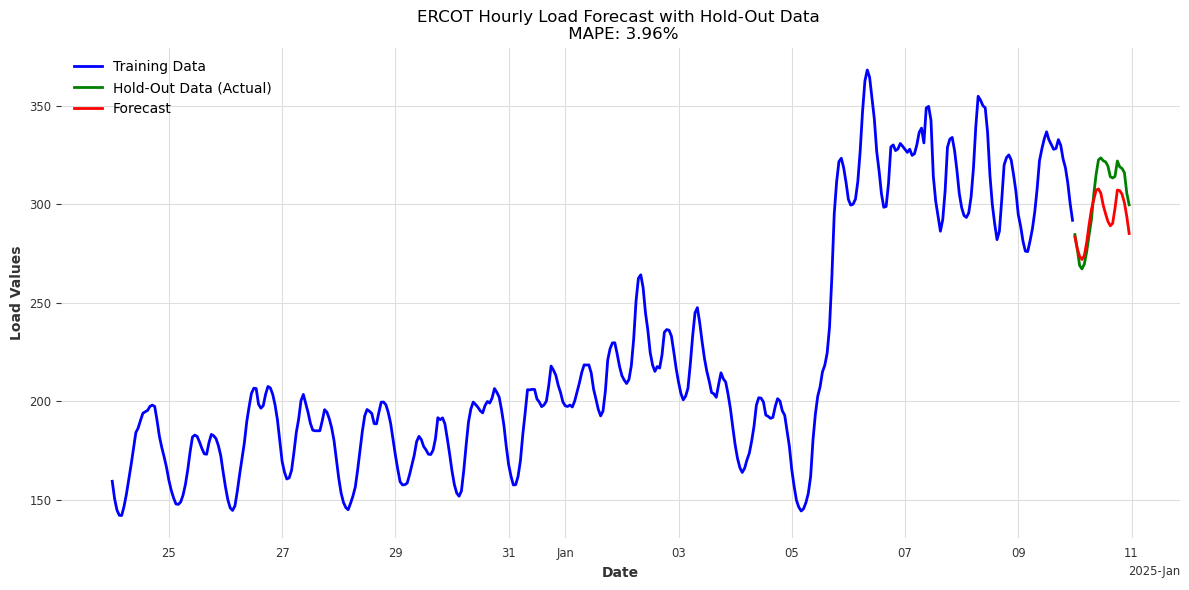

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape


# Load the ERCOT data
df = pd.read_csv("ercot_load_data.csv")
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
df['values'] = pd.to_numeric(df['values'], errors='coerce')  # Convert 'values' to numeric
df = df.sort_values('date')  # Sort by date

# Drop rows with missing or NaN values
df = df.dropna()

# Resample the data to hourly frequency
df = df.set_index('date').resample('h').mean().reset_index()  # Resample and take the mean for each hour

# Define hold-out period
hold_out_hours = 24  # 24 hours = 1 day
train = df.iloc[:-hold_out_hours]
hold_out = df.iloc[-hold_out_hours:]

# Create TimeSeries for training and hold-out data
series_train = TimeSeries.from_dataframe(train, 'date', 'values', freq="h", fill_missing_dates=True)
series_hold_out = TimeSeries.from_dataframe(hold_out, 'date', 'values', freq="h")

# Fit the Exponential Smoothing model on training data
model = ExponentialSmoothing()
model.fit(series_train)

# Forecast the hold-out period
forecast = model.predict(len(series_hold_out))

# Calculate MAPE
mape_result = mape(series_hold_out, forecast)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
series_train.plot(label="Training Data", color='blue')

# Plot hold-out data
series_hold_out.plot(label="Hold-Out Data (Actual)", color='green')

# Plot forecasted data
forecast.plot(label="Forecast", color='red')

plt.title(f"ERCOT Hourly Load Forecast with Hold-Out Data \n MAPE: {mape_result:.2f}%")
plt.xlabel("Date")
plt.ylabel("Load Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ERCOT_Hourly_HoldOut_Forecast.png")
plt.show()


In [6]:
"""
ARIMA
"""
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA
    
# Fit the ARIMA model and predict the next 30 steps with 1000 samples
model = ARIMA(p=1, d=1, q=1)  # Adjust these parameters as needed
model.fit(series)
forecast = model.predict(n=30, num_samples=1000)
    
# Plot the results with uncertainty 
plt.figure(figsize=(12, 6))
series[-365:].plot(label="Actual", color='blue')
forecast.plot(label="Forecast", color='red')
    
plt.title("10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ARIMA_Forecast.png")
plt.show()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.3/963.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 40.2 MB/s eta 0:00:00
  Created wheel for pyod: filename=pyod-2.0.3-py3-none-any.whl size=200466 sha256=b804462f7a45ae226d71924eee4d3e71a004134ce5b0744ead9b323fd0701412
  Stored in directory: /Users/kylejonespatricia/Library/Caches/pip/wheels/16/7c/ed/ebc8a4a1a530f7e955ed494a8c2085079f0ef34e3bc0735c97
Successfully built pyod


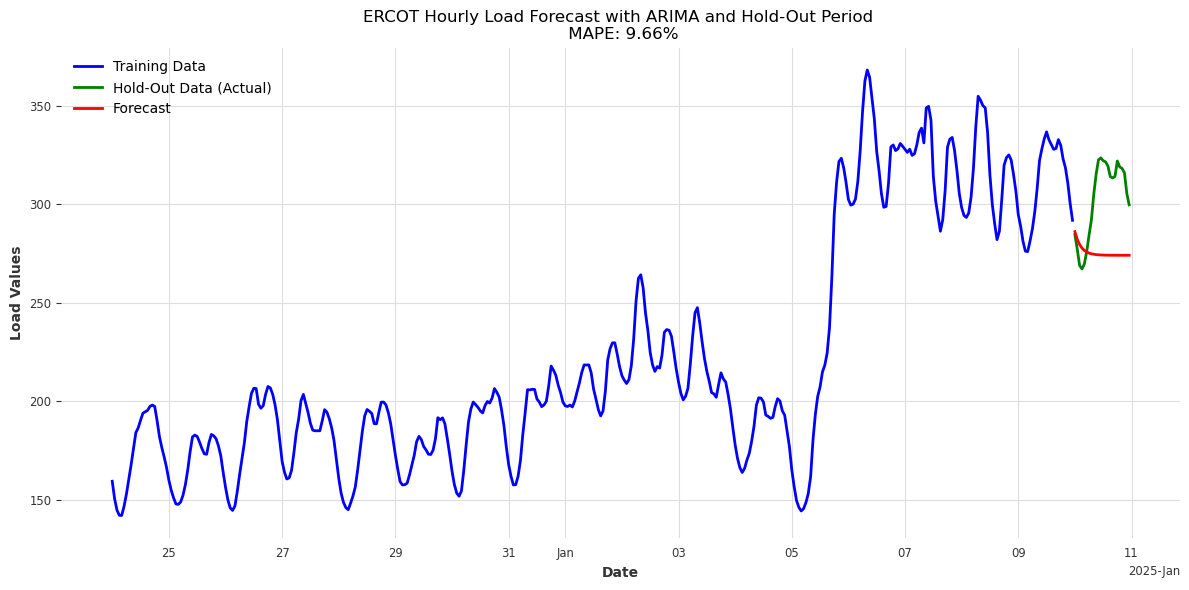

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA


# Define hold-out period
hold_out_hours = 24  # Example: 24 hours = 1 day
train = df.iloc[:-hold_out_hours]
hold_out = df.iloc[-hold_out_hours:]

# Create TimeSeries for training and hold-out data
series_train = TimeSeries.from_dataframe(train, 'date', 'values', freq="h", fill_missing_dates=True)
series_hold_out = TimeSeries.from_dataframe(hold_out, 'date', 'values', freq="h")

# Fit the ARIMA model
model = ARIMA(p=1, d=1, q=1)  # You can adjust p, d, q parameters
model.fit(series_train)

# Forecast the hold-out period
forecast = model.predict(len(series_hold_out))
# Calculate MAPE
mape_result = mape(series_hold_out, forecast)

# Plot the results
plt.figure(figsize=(12, 6))


series_train.plot(label="Training Data", color='blue')
series_hold_out.plot(label="Hold-Out Data (Actual)", color='green')
forecast.plot(label="Forecast", color='red')

plt.title(f"ERCOT Hourly Load Forecast with ARIMA and Hold-Out Period \n MAPE: {mape_result:.2f}%")
plt.xlabel("Date")
plt.ylabel("Load Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ARIMA_Hourly_HoldOut_Forecast.png")
plt.show()


In [54]:
df.date.min()

Timestamp('2024-12-24 00:00:00')